In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# 뽐뿌 인기글
# 수집하고 싶은 페이지url 가져옴

page = 1
url = f"http://www.ppomppu.co.kr/hot.php?id=&page={page}&category=1&search_type=&keyword=&page_num=&del_flag=&bbs_list_category=0"

In [3]:
# url로 요청하여 가져옴
response = requests.get(url)
response

<Response [200]>

In [4]:
# html을 beautifulsoup을 이용하여 파싱
dom = BeautifulSoup(response.content, 'html.parser')
dom

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="PPOMPPU CO." name="author"/>
<meta content="쇼핑몰핫딜, 쿠폰 및 이벤트, 사용기, 휴대폰 등 쇼핑 정보 제공" name="description"/>
<meta content="" name="keywords"/>
<script async="async" src="//www.googletagservices.com/tag/js/gpt.js"></script>
<script>var googletag = googletag || {};googletag.cmd = googletag.cmd || [];</script>
<!--
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />
-->
<meta content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" property="og:image">
<meta content="뽐뿌" property="og:site_name">
<title>뽐뿌

In [5]:
# 원하는 위치 select
elements = dom.select('.board_table > .line')
len(elements)

20

In [6]:
# 크롤링 저장
datas = []
for element in elements:
    datas.append({
        'board': element.select_one('td:nth-child(1)').text.strip(),
        'ID': element.select_one('td:nth-child(2)').text.strip(),
        'title': element.select_one('td:nth-child(4) > a').text.strip(),
        'comments': element.select_one('td:nth-child(4) > sup').text.strip(),
        'link': 'http://www.ppomppu.co.kr' + element.select_one('td:nth-child(4) > a').get('href'),
        'date': element.select_one('.board_date:nth-child(1)').text.strip(),
        'like': element.select_one('.board_date:nth-child(2)').text.split('-')[0],
        'unlike': element.select_one('.board_date:nth-child(2)').text.split('-')[1],
        'view': element.select_one('.board_date:nth-child(3)').text.strip(),
    })

In [7]:
# 데이터 프레임으로 변환
df_ppomppu_hot = pd.DataFrame(datas)
df_ppomppu_hot['comments'] = df_ppomppu_hot['comments'].astype('int64')

In [8]:
# 함수로 만들기
def ppomppu_hot(page):
    url = f"http://www.ppomppu.co.kr/hot.php?id=&page={page}&category=1&search_type=&keyword=&page_num=&del_flag=&bbs_list_category=0"
    # url로 요청하여 가져옴
    response = requests.get(url)
    # html을 beautifulsoup을 이용하여 파싱
    dom = BeautifulSoup(response.content, 'html.parser')
    # 원하는 위치 select
    elements = dom.select('.board_table > .line')
    # 크롤링 저장
    for element in elements:
        datas.append({
            'board': element.select_one('td:nth-child(1)').text.strip(),
            'ID': element.select_one('td:nth-child(2)').text.strip(),
            'title': element.select_one('td:nth-child(4) > a').text.strip(),
            'comments': element.select_one('td:nth-child(4) > sup').text.strip(),
            'link': 'http://www.ppomppu.co.kr' + element.select_one('td:nth-child(4) > a').get('href'),
            'date': element.select_one('.board_date:nth-child(1)').text.strip(),
            'like': element.select_one('.board_date:nth-child(2)').text.split('-')[0],
            'unlike': element.select_one('.board_date:nth-child(2)').text.split('-')[1],
            'view': element.select_one('.board_date:nth-child(3)').text.strip(),
        })
    print(f"crawling : {page}")
    # 데이터 프레임으로 만들기
    df_ppomppu_hot = pd.DataFrame(datas)
    df_ppomppu_hot['comments'] = df_ppomppu_hot['comments'].astype('int64')
    return df_ppomppu_hot

In [9]:
def make_ppomppu(N):
    datas = []
    for page in range(1, N+1):
        result = ppomppu_hot(page)
    return result

In [10]:
# 함수로 만들기 버전2
# 페이지를 선택할수 있게 만듬
def make_ppomppu(N, M):
    datas = []
    for page in range(N, M+1):
        def ppomppu_hot(page):
            url = f"http://www.ppomppu.co.kr/hot.php?id=&page={page}&category=1&search_type=&keyword=&page_num=&del_flag=&bbs_list_category=0"
            # url로 요청하여 가져옴
            response = requests.get(url)
            # html을 beautifulsoup을 이용하여 파싱
            dom = BeautifulSoup(response.content, 'html.parser')
            # 원하는 위치 select
            elements = dom.select('.board_table > .line')
            # 크롤링 저장
            for element in elements:
                datas.append({
                    'board': element.select_one('td:nth-child(1)').text.strip(),
                    'ID': element.select_one('td:nth-child(2)').text.strip(),
                    'title': element.select_one('td:nth-child(4) > a').text.strip(),
                    'comments': element.select_one('td:nth-child(4) > sup').text.strip(),
                    'link': 'http://www.ppomppu.co.kr' + element.select_one('td:nth-child(4) > a').get('href'),
                    'date': element.select_one('.board_date:nth-child(1)').text.strip(),
                    'like': element.select_one('.board_date:nth-child(2)').text.split('-')[0],
                    'unlike': element.select_one('.board_date:nth-child(2)').text.split('-')[1],
                    'view': element.select_one('.board_date:nth-child(3)').text.strip(),
                })
            print(f" page {page} crawling ",  end='')
            # 데이터 프레임으로 만들기
            df_ppomppu_hot = pd.DataFrame(datas)
            df_ppomppu_hot['comments'] = df_ppomppu_hot['comments'].astype(
                'int64')
            return df_ppomppu_hot
        result = ppomppu_hot(page)
    return result

In [11]:
make_1 = make_ppomppu(1, 5)
make_1

 page 1 crawling  page 2 crawling  page 3 crawling  page 4 crawling  page 5 crawling 

,board,ID,title,comments,link,date,like,unlike,view
0,자유갤러리,당구왕삑사리,우리집 진상,7,http://www.ppomppu.co.kr/zboard/view.php?id=fr...,01:07:01,15,0,371
1,자유게시판,차메로랑고스타,동네 약국 마스크 판매법,26,http://www.ppomppu.co.kr/zboard/zboard.php?id=...,01:05:02,1,0,4277
2,자유게시판,걸그룹전문가,약후) 댄스팀 골반 하체 좋은처자.gif,47,http://www.ppomppu.co.kr/zboard/zboard.php?id=...,00:50:01,2,0,10885
3,윈도우태블릿,00600,5175 c타입테스트결과,12,http://www.ppomppu.co.kr/zboard/view.php?id=wi...,00:47:01,1,0,1342
4,유머/감동,vip8371,헬스장에서 운동중 당한 몸매녀 ㄷㄷㄷ,11,http://www.ppomppu.co.kr/zboard/view.php?id=hu...,00:47:01,0,0,12322
...,...,...,...,...,...,...,...,...,...
95,안드로이드탭,zeronine0...,fire hd10 받았네요,8,http://www.ppomppu.co.kr/zboard/view.php?id=an...,20/03/03,0,0,3007
96,유머/감동,Cadenza,(보배펌) 역주행 자라니 사고.gif,68,http://www.ppomppu.co.kr/zboard/view.php?id=hu...,20/03/03,2,0,14789
97,자유게시판,무조건님,한의원 채용 공고.JPG,51,http://www.ppomppu.co.kr/zboard/zboard.php?id=...,20/03/03,1,0,15870
98,뽐뿌게시판,날으는-,"[지마켓] 삼광미 특등급 10kg +10kg(53,870/무료)",32,http://www.ppomppu.co.kr/zboard/view.php?id=pp...,20/03/03,17,0,6254


In [12]:
make_2 = make_ppomppu(6, 10)

 page 6 crawling  page 7 crawling  page 8 crawling  page 9 crawling  page 10 crawling 

In [13]:
# 데이터 시각화를 위한 테이블변환
make_2_title_table = make_2.pivot_table(
    index='board', values='title', aggfunc='count').sort_values(by='title', ascending=False)
make_2_title_table.head()

,title
board,
자유게시판,35
자동차포럼,10
재테크포럼,9
뽐뿌게시판,9
유머/감동,4


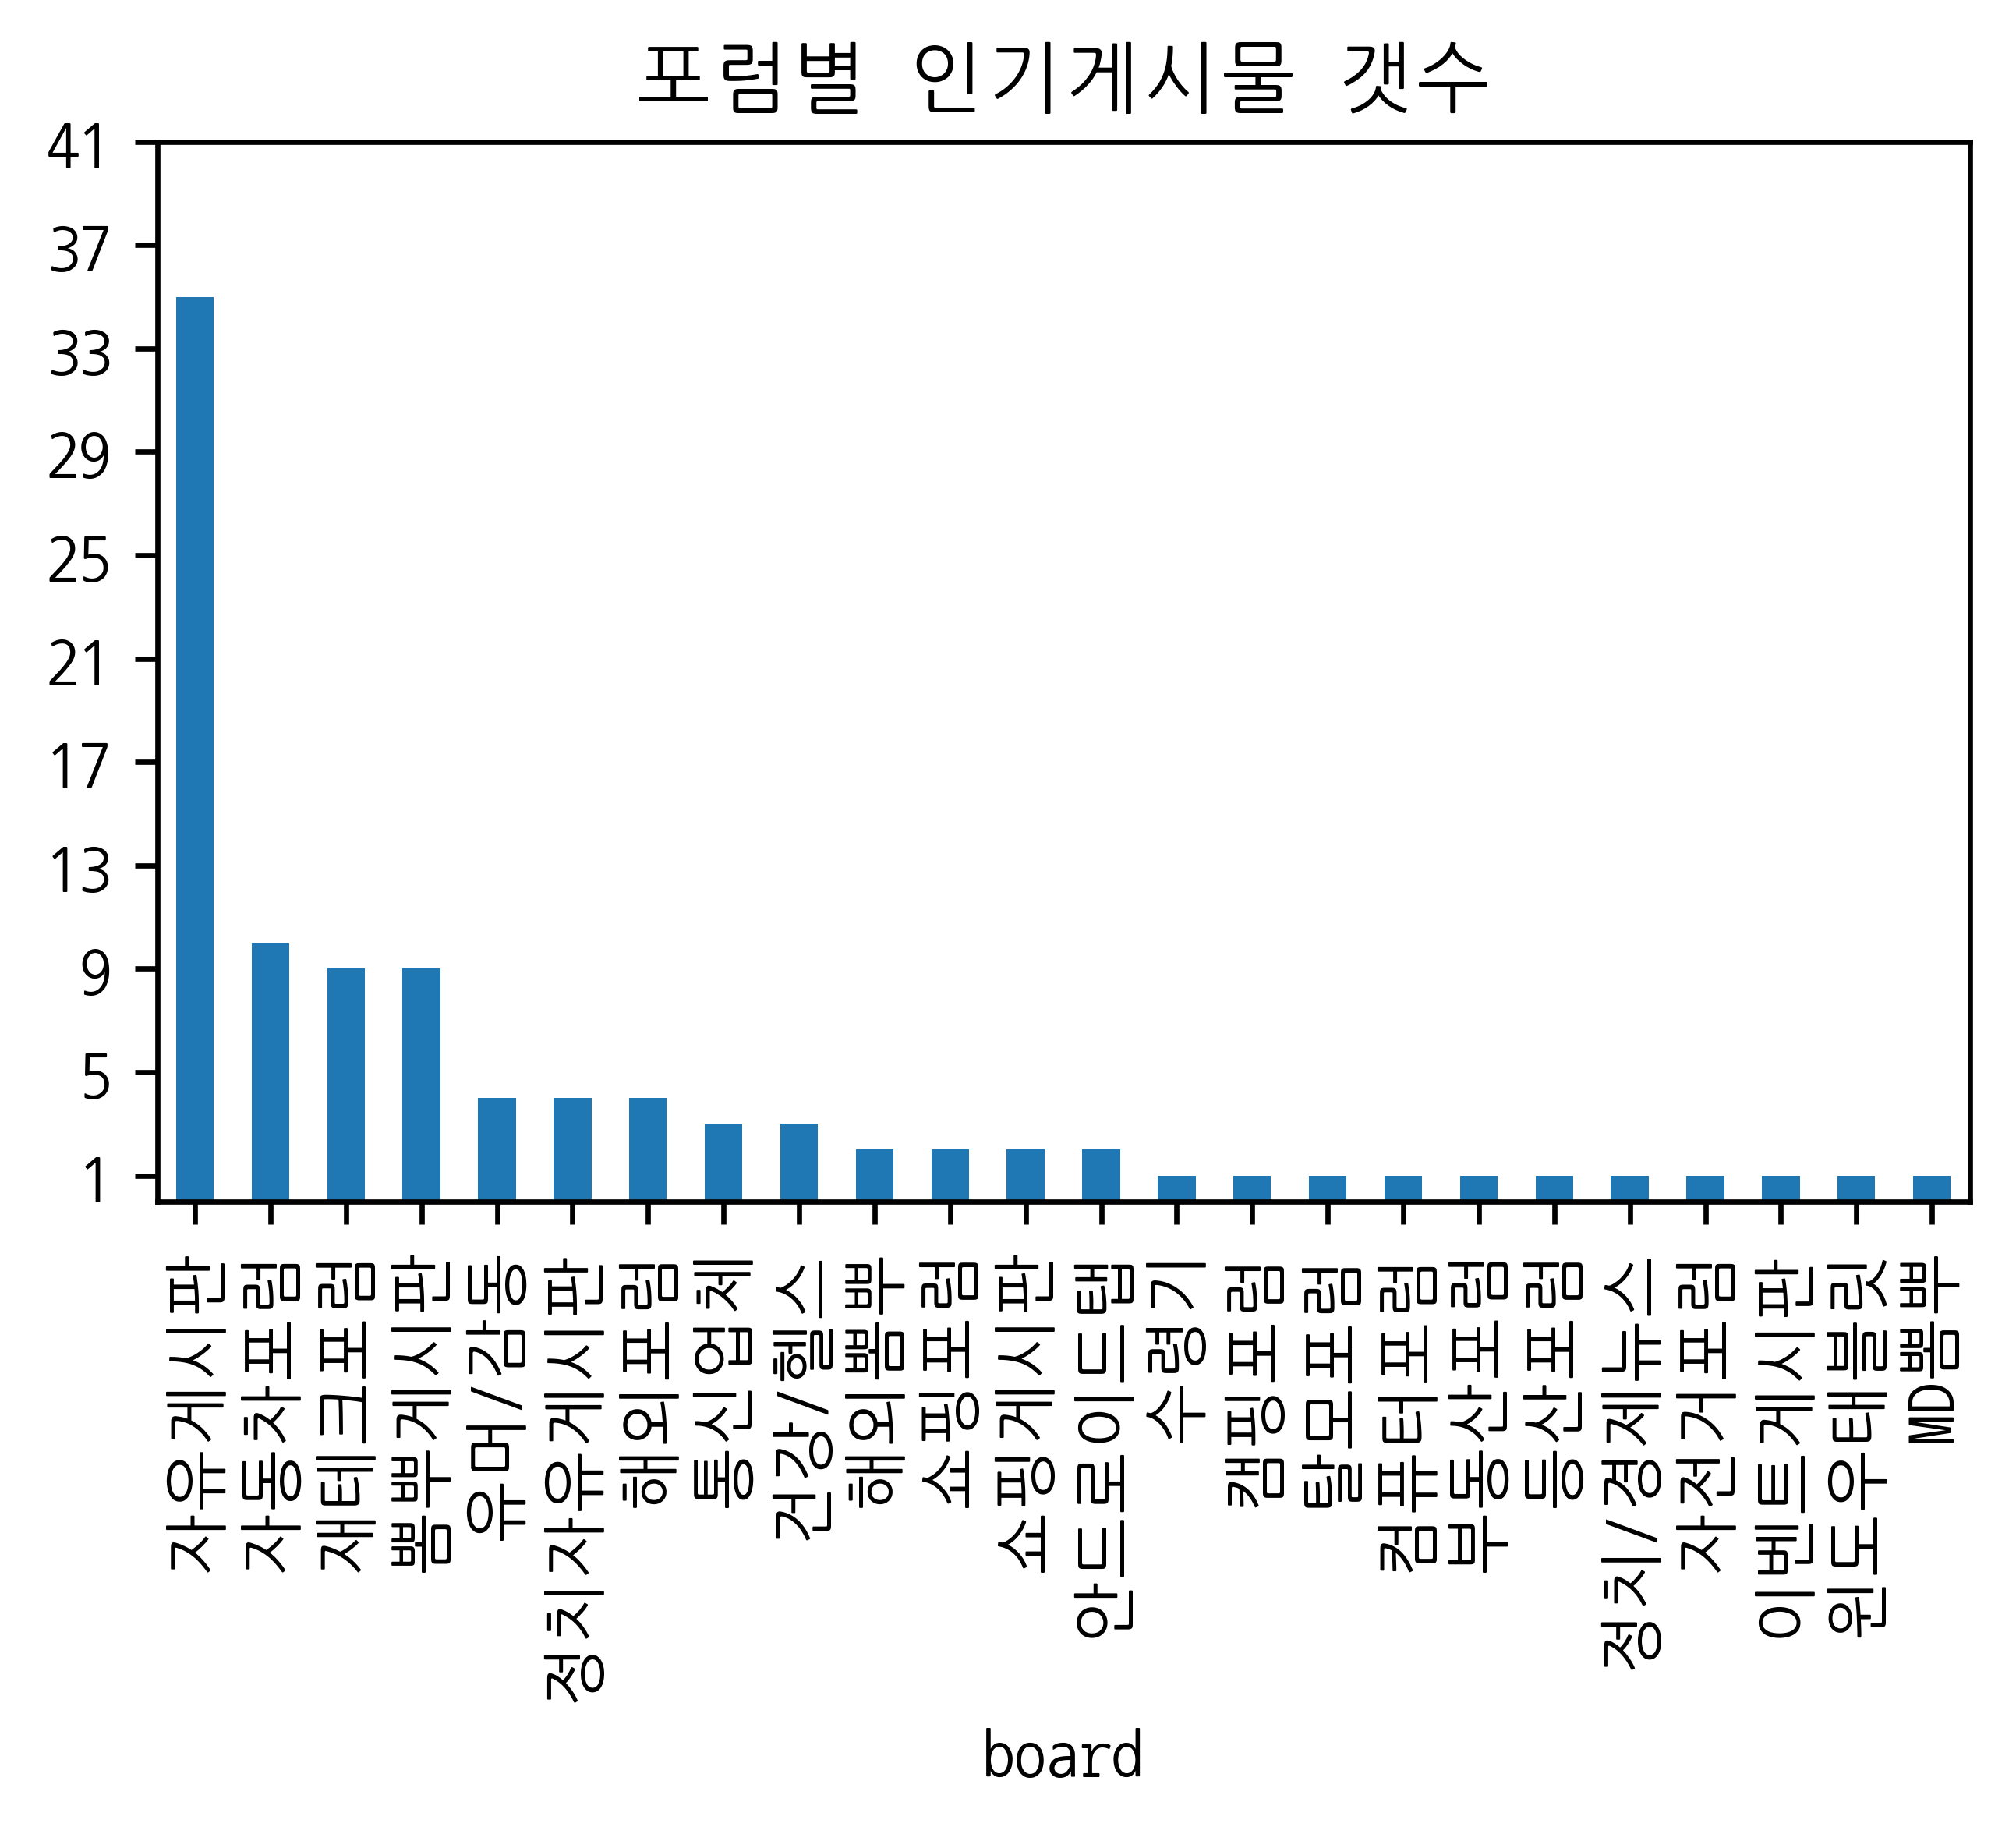

In [14]:
# 데이터 시각화
yticks = make_2_title_table.max() // make_2_title_table.mean()
make_2_title_table.plot(kind='bar', figsize=(
    5, 3), title='포럼별 인기게시물 갯수', yticks= list(range(1,45,4)), legend=False)
plt.show()